## Imports

In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import numpy as np
import matplotlib.pyplot as plt

from toolbox import load_numpy, UniversalConstants

ntokens: 4238


## Constants

In [2]:
uc = UniversalConstants()
final_seeds = uc.final_seeds

In [3]:
# some set up stuff: define the epoch we have (useful in plotting later) and the baseline scores so we can plot those too
x = np.arange(1,41) # this is the epochs: 1 up to and including 40
li_train_baseline = [0.2842668873590891] * 40 # paper explains how we got these numbers.
li_test_baseline = [0.286286859433152] * 40 # you may check, of course - i also dont know what the baseline is for validation.
sp_train_baseline = [0.09077229808524245] * 40 #
sp_test_baseline = [0.08932150014314343] * 40 #

# load all the scores: test and train. we only want train and val for now so we should change that.

# tehse were the seeds we included. you may have used different ones so check.
# final_seeds = [123, 234, 345, 456, 567, 678, 789, 890, 901, 12, 23, 34, 45, 56, 67, 78, 89, 90, 1, 100]

lr = 0.001 #learning rate
path = "../loss_acc/"
# i found this nested dictionary useful to be able to get the data that I wanted by looping through the parameters.
# you are not obliged to do it this way, of course; but this is how it is referred to in the plotting code.
# note that i'm only using one lr setting here, the one we eventally reported. you can make a decision on 
# which lr to use based on the validation results. you can also make this plot for all lrs and 
# then we can look together on monday.
train_scores = {"sp":{"plasticity": {"loss": [], "acc": []}, "sn":{"loss": [], "acc":[]}, "curious":{"loss": [], "acc": []}, "random":{"loss": [], "acc": []}}, 
                   "li":{"plasticity": {"loss": [], "acc": []}, "sn":{"loss": [], "acc":[]}, "curious":{"loss": [], "acc": []}, "random":{"loss": [], "acc": []}}}
# instead of test scores, you should use val scores, for now
val_scores = {"sp":{"plasticity": {"loss": [], "acc": []}, "sn":{"loss": [], "acc":[]}, "curious":{"loss": [], "acc": []}, "random":{"loss": [], "acc": []}},
               "li":{"plasticity": {"loss": [], "acc": []}, "sn":{"loss": [], "acc":[]},  "curious":{"loss": [], "acc": []}, "random":{"loss": [], "acc": []}}} 
for agent in ["sp", "li"]:
    for _cc in ["plasticity", "sn", "random", "curious"]: # add you conditions
        for metric in ["loss", "acc"]:
            if _cc == "plasticity" or _cc== "sn":
                train_s = [load_numpy((path+_cc+"/"), agent, "train", metric, lr, _cc, seed) for seed in final_seeds]
                train_scores[agent][_cc][metric] = train_s
                val_s = [load_numpy((path+_cc+"/"), agent, "val", metric, lr, _cc, seed) for seed in final_seeds]
                val_scores[agent][_cc][metric] = val_s
            elif _cc == "random" or _cc == "curious":
                train_s = [load_numpy((path+"final/"), agent, "train", metric, lr, _cc, seed) for seed in final_seeds]
                train_scores[agent][_cc][metric] = train_s
                val_s = [load_numpy((path+"final/"), agent, "val", metric, lr, _cc, seed) for seed in final_seeds]
                val_scores[agent][_cc][metric] = val_s
            else:
                print("Problem in your code!")

FileNotFoundError: [Errno 2] No such file or directory: '../loss_acc/plasticity/sp_train_loss_0.001_plasticity_123.npy'

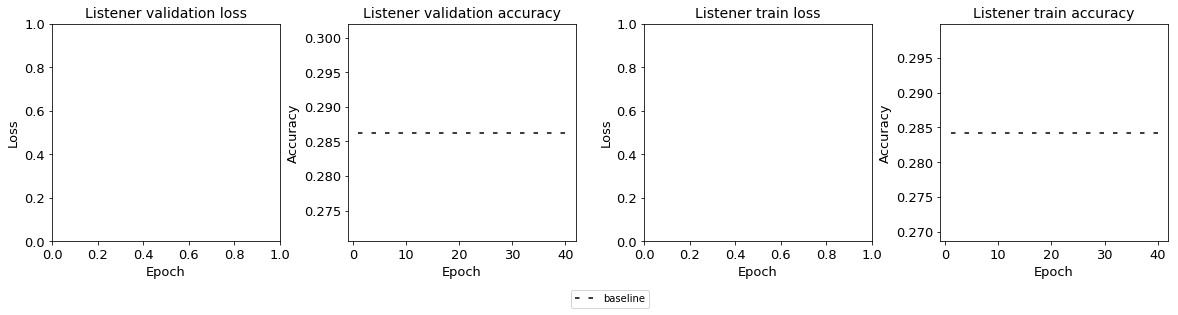

In [4]:
# This is the code that makes the plot with 4 subplots for Listener: test & train * accuracy & loss. 
# of course we can do basically the same for Speaker. 
# You could make it into a plot and a subplot function, if you prefer!
# remember we only want validation scores for now, so we need to change that.
# this code is mostly matplotlib for making it look the way we want!
figure = plt.figure(figsize=[20,4])
figure.subplots_adjust(hspace=0.4, wspace=0.3)

# making the subplot with the test loss
subplot_li_val_loss = figure.add_subplot(1,4,1) # this means we are making the first subplot in a grid of 4 by 1
subplot_li_val_loss.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_li_val_loss.set_title('Listener validation loss', fontsize=14)
# plotting the Plasticity condition in blue
for scores in val_scores["li"]["plasticity"]["loss"]:
    subplot_li_val_loss.plot(x, scores, label='Plasticity', color="steelblue", linewidth=.8)
# plotting the Subjective Novelty condition in orange
for scores in val_scores["li"]["sn"]["loss"]:
    subplot_li_val_loss.plot(x, scores, label='Subjective Novelty', color="darkorange", linewidth=.8)
# plotting the curious condition in ###
for scores in val_scores["li"]["curious"]["loss"]:
    subplot_li_val_loss.plot(x, scores, label='Curious', color="red", linewidth=.8)
    
# plotting random in ###
for scores in val_scores["li"]["random"]["loss"]:
    subplot_li_val_loss.plot(x, scores, label='Random', color="green", linewidth=.8)

plt.ylabel('Loss', fontsize=13) # add labels so we know what the axes refer to
plt.xlabel('Epoch', fontsize=13)

# making the subplot for val acc
subplot_li_val_acc = figure.add_subplot(1,4,2) # second subplot in a 4 by 1 grid
subplot_li_val_acc.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_li_val_acc.set_title('Listener validation accuracy', fontsize=14)
for scores in val_scores["li"]["plasticity"]["acc"]:
    subplot_li_val_acc.plot(x, scores, label='plasticity', color="steelblue", linewidth=.8)
for scores in val_scores["li"]["sn"]["acc"]:
    subplot_li_val_acc.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.8)
for scores in val_scores["li"]["curious"]["acc"]:
    subplot_li_val_acc.plot(x, scores, label='curious', color="red", linewidth=.8)
for scores in val_scores["li"]["random"]["acc"]:
    if len(scores) == 40:
        subplot_li_val_acc.plot(x, scores, label='random', color="green", linewidth=.8)

# we plot the baseline score as well as the performance of the different model runs
subplot_li_val_acc.plot(x, li_test_baseline, label='baseline', dashes=[3,6], color='black')
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)

# making the subplot for train loss
subplot_li_train_loss = figure.add_subplot(1,4,3) # 3rd subplot in a 4 by 1 grid
subplot_li_train_loss.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_li_train_loss.set_title('Listener train loss', fontsize=14)
for scores in train_scores["li"]["plasticity"]["loss"]:
    subplot_li_train_loss.plot(x, scores, label='plasticity', color="steelblue", linewidth=.8)
for scores in train_scores["li"]["sn"]["loss"]:
    subplot_li_train_loss.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.8)
for scores in train_scores["li"]["curious"]["loss"]:
    subplot_li_train_loss.plot(x, scores, label='curious', color="red", linewidth=.8)
for scores in train_scores["li"]["random"]["loss"]:
    subplot_li_train_loss.plot(x, scores, label='random', color="green", linewidth=.8)
plt.ylabel('Loss', fontsize=13)
plt.xlabel('Epoch', fontsize=13)

# making the subplot for train accuracy
subplot_li_train_acc = figure.add_subplot(1,4,4) # 4th subplot in a four by one grid
subplot_li_train_acc.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_li_train_acc.set_title('Listener train accuracy', fontsize=14)
for scores in train_scores["li"]["plasticity"]["acc"]:
    subplot_li_train_acc.plot(x, scores, label='plasticity', color="steelblue", linewidth=.8)
for scores in train_scores["li"]["sn"]["acc"]:
    subplot_li_train_acc.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.8)
for scores in train_scores["li"]["curious"]["acc"]:
    subplot_li_train_acc.plot(x, scores, label='curious', color="red", linewidth=.8)
for scores in train_scores["li"]["random"]["acc"]:
    if len(scores) == 40:
        subplot_li_train_acc.plot(x, scores, label='random', color="green", linewidth=.8)
    
subplot_li_train_acc.plot(x, li_train_baseline, label='baseline', dashes=[3,6], color='black')

plt.legend(loc='upper center', bbox_to_anchor=(-1.45, -0.2), ncol=3) # the legend needed to be added to the plot
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)

# show the combined plot so we can see what it looks like
plt.show()

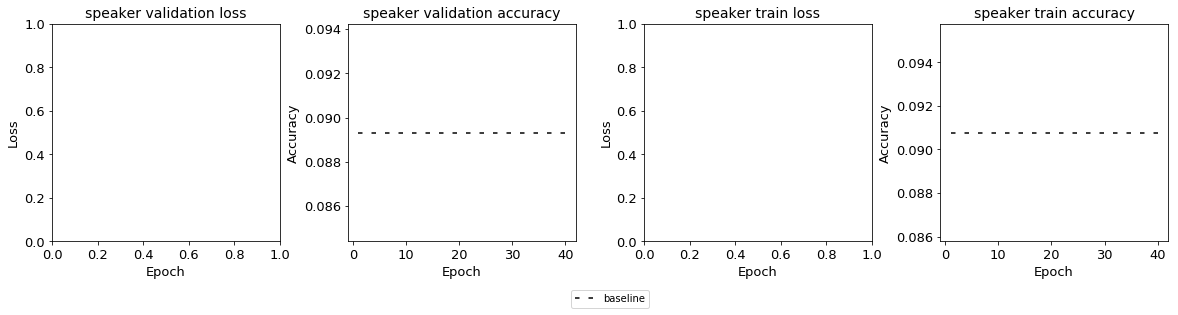

In [5]:
# This is the code that makes the plot with 4 subplots for speaker: test & train * accuracy & loss. 
# of course we can do basically the same for Speaker. 
# You could make it into a plot and a subplot function, if you prefer!
# remember we only want validation scores for now, so we need to change that.
# this code is mostly matplotlib for making it look the way we want!
figure = plt.figure(figsize=[20,4])
figure.subplots_adjust(hspace=0.4, wspace=0.3)

# making the subplot with the test loss
subplot_sp_val_loss = figure.add_subplot(1,4,1) # this means we are making the first subplot in a grid of 4 by 1
subplot_sp_val_loss.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_sp_val_loss.set_title('speaker validation loss', fontsize=14)
# plotting the Plasticity condition in blue
for scores in val_scores["sp"]["plasticity"]["loss"]:
    subplot_sp_val_loss.plot(x, scores, label='Plasticity', color="steelblue", linewidth=.8)
# plotting the Subjective Novelty condition in orange
for scores in val_scores["sp"]["sn"]["loss"]:
    subplot_sp_val_loss.plot(x, scores, label='Subjective Novelty', color="darkorange", linewidth=.8)
# plotting the curious condition in ###
for scores in val_scores["sp"]["curious"]["loss"]:
    subplot_sp_val_loss.plot(x, scores, label='Curious', color="red", linewidth=.8)
    
# plotting random in ###
for scores in val_scores["sp"]["random"]["loss"]:
    subplot_sp_val_loss.plot(x, scores, label='Random', color="green", linewidth=.8)

plt.ylabel('Loss', fontsize=13) # add labels so we know what the axes refer to
plt.xlabel('Epoch', fontsize=13)

# making the subplot for val acc
subplot_sp_val_acc = figure.add_subplot(1,4,2) # second subplot in a 4 by 1 grid
subplot_sp_val_acc.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_sp_val_acc.set_title('speaker validation accuracy', fontsize=14)
for scores in val_scores["sp"]["plasticity"]["acc"]:
    subplot_sp_val_acc.plot(x, scores, label='plasticity', color="steelblue", linewidth=.8)
for scores in val_scores["sp"]["sn"]["acc"]:
    subplot_sp_val_acc.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.8)
for scores in val_scores["sp"]["curious"]["acc"]:
    subplot_sp_val_acc.plot(x, scores, label='curious', color="red", linewidth=.8)
for scores in val_scores["sp"]["random"]["acc"]:
    if len(scores) == 40:
        subplot_sp_val_acc.plot(x, scores, label='random', color="green", linewidth=.8)

# we plot the baseline score as well as the performance of the different model runs
subplot_sp_val_acc.plot(x, sp_test_baseline, label='baseline', dashes=[3,6], color='black')
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)

# making the subplot for train loss
subplot_sp_train_loss = figure.add_subplot(1,4,3) # 3rd subplot in a 4 by 1 grid
subplot_sp_train_loss.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_sp_train_loss.set_title('speaker train loss', fontsize=14)
for scores in train_scores["sp"]["plasticity"]["loss"]:
    subplot_sp_train_loss.plot(x, scores, label='plasticity', color="steelblue", linewidth=.8)
for scores in train_scores["sp"]["sn"]["loss"]:
    subplot_sp_train_loss.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.8)
for scores in train_scores["sp"]["curious"]["loss"]:
    subplot_sp_train_loss.plot(x, scores, label='curious', color="red", linewidth=.8)
for scores in train_scores["sp"]["random"]["loss"]:
    subplot_sp_train_loss.plot(x, scores, label='random', color="green", linewidth=.8)
plt.ylabel('Loss', fontsize=13)
plt.xlabel('Epoch', fontsize=13)

# making the subplot for train accuracy
subplot_sp_train_acc = figure.add_subplot(1,4,4) # 4th subplot in a four by one grid
subplot_sp_train_acc.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_sp_train_acc.set_title('speaker train accuracy', fontsize=14)
for scores in train_scores["sp"]["plasticity"]["acc"]:
    subplot_sp_train_acc.plot(x, scores, label='plasticity', color="steelblue", linewidth=.8)
for scores in train_scores["sp"]["sn"]["acc"]:
    subplot_sp_train_acc.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.8)
for scores in train_scores["sp"]["curious"]["acc"]:
    subplot_sp_train_acc.plot(x, scores, label='curious', color="red", linewidth=.8)
for scores in train_scores["sp"]["random"]["acc"]:
    if len(scores) == 40:
        subplot_sp_train_acc.plot(x, scores, label='random', color="green", linewidth=.8)
    
subplot_sp_train_acc.plot(x, sp_train_baseline, label='baseline', dashes=[3,6], color='black')

plt.legend(loc='upper center', bbox_to_anchor=(-1.45, -0.2), ncol=3) # the legend needed to be added to the plot
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)

# show the combined plot so we can see what it looks like
plt.show()

In [12]:
# save it in 3 different formats for use in the paper
figure.savefig('Listener results horizontal_not scaled.svg', bbox_inches='tight', format='svg')
figure.savefig('Listener results horizontal_not scaled.pdf', bbox_inches='tight', format='pdf')
figure.savefig('Listener results horizontal_not scaled.png', bbox_inches='tight', format='png', dpi = 300)

# Plots for Unsupervised

In [15]:
# Loading the data
lr = 0.001 #learning rate
path = "/home/u1270964/curiosity/loss_acc/unsupervised"
final_seeds = [123, 234, 345, 456, 567, 678, 789, 890, 901, 12, 23, 34, 45, 56, 67, 78, 89, 90, 1, 100]
train_scores = {"sp_acc":{"plasticity": [], "sn":[], "curious":[], "random":[]},
                "li_acc":{"plasticity": [], "sn":[], "curious":[], "random":[]},
                "loss":{"plasticity": [], "sn":[], "curious":[], "random":[]}}
                # instead of test scores, you should use val scores, for now
val_scores = {"sp_acc":{"plasticity": [], "sn":[], "curious":[], "random":[]},
                "li_acc":{"plasticity": [], "sn":[], "curious":[], "random":[]},
                "loss":{"plasticity": [], "sn":[], "curious":[], "random":[]}}

for agent in ["sp", "li"]:
    for _cc in ["plasticity", "sn", "random", "curious"]: 
        # load loss
        train_loss = [np.load("{}/train_loss_{}_{}_{}.npy".format(path, lr, _cc, seed)) for seed in final_seeds]
        train_scores["loss"][_cc] = train_loss
        val_loss = [np.load("{}/test_loss_{}_{}_{}.npy".format(path, lr, _cc, seed)) for seed in final_seeds]
        val_scores["loss"][_cc] = val_loss
        # load acc listener & speaker
        train_s = [np.load("{}/{}_train_acc_{}_{}_{}.npy".format(path, agent, lr, _cc, seed)) for seed in final_seeds] 
        train_scores[agent+"_acc"][_cc] = train_s
        val_s = [np.load("{}/{}_test_acc_{}_{}_{}.npy".format(path, agent, lr, _cc, seed)) for seed in final_seeds] 
        val_scores[agent+"_acc"][_cc] = val_s

In [16]:
for score in val_scores:
    print(score)
    print(val_scores[score])
    print()

sp_acc
{'plasticity': [array([0.12482107, 0.12653879, 0.14915545, 0.15860292, 0.1720584 ,
       0.1743487 , 0.17835671, 0.18179216, 0.18179216, 0.18751789,
       0.19095334, 0.19524764, 0.1938162 , 0.1918122 , 0.19496135,
       0.1961065 , 0.19553392, 0.19009447, 0.20211852, 0.19496135,
       0.19811051, 0.19467506, 0.19553392, 0.19123962, 0.19209848,
       0.19295734, 0.19438878, 0.19352992, 0.18866304, 0.19667907,
       0.18350988, 0.1895219 , 0.18608646, 0.19095334, 0.18751789,
       0.19066705, 0.18751789, 0.18408245, 0.19066705, 0.18665903]), array([0.12482107, 0.1328371 , 0.14972803, 0.16604638, 0.17291726,
       0.18036072, 0.1829373 , 0.18322359, 0.18665903, 0.18923561,
       0.18751789, 0.18866304, 0.18980819, 0.1852276 , 0.19295734,
       0.18980819, 0.19438878, 0.19868308, 0.19868308, 0.19725165,
       0.19467506, 0.19982823, 0.19553392, 0.19782422, 0.18894933,
       0.19496135, 0.19352992, 0.19839679, 0.19123962, 0.19753793,
       0.19467506, 0.18980819, 0.1903

Text(0.5,0,'Epoch')

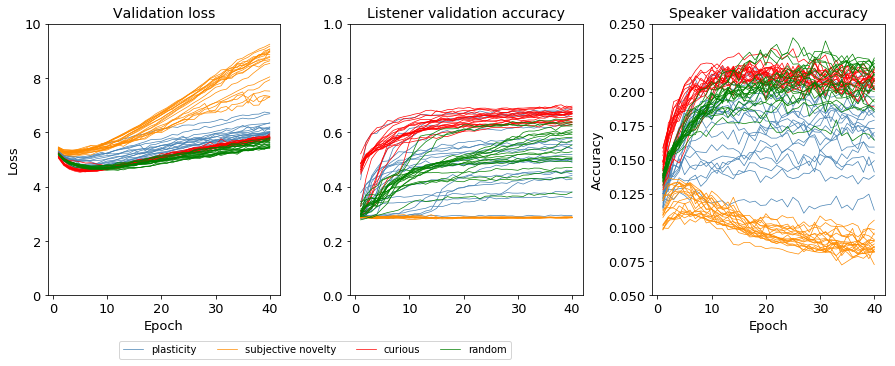

In [21]:
figure = plt.figure(figsize=[15, 5])
figure.subplots_adjust(hspace=0.4, wspace=0.3)

# making the subplot with valloss
subplot_li_val_loss = figure.add_subplot(1,3,1) # this means we are making the first subplot in a grid of 4 by 1
subplot_li_val_loss.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_li_val_loss.set_title('Validation loss', fontsize=14)
# plotting the Plasticity condition in blue
for scores in val_scores["loss"]["plasticity"]:
    subplot_li_val_loss.plot(x, scores, label='Plasticity', color="steelblue", linewidth=.7)
# plotting the Subjective Novelty condition in orange
for scores in val_scores["loss"]["sn"]:
    subplot_li_val_loss.plot(x, scores, label='Subjective Novelty', color="darkorange", linewidth=.7)
# plotting the curious condition in red
for scores in val_scores["loss"]["curious"]:
    subplot_li_val_loss.plot(x, scores, label='Curious', color="red", linewidth=.7)    
# plotting random in green
for scores in val_scores["loss"]["random"]:
    subplot_li_val_loss.plot(x, scores, label='Random', color="green", linewidth=.7)  
plt.ylabel('Loss', fontsize=13) # add labels so we know what the axes refer to
plt.xlabel('Epoch', fontsize=13)
plt.ylim(0.0, 10.0)

# making the subplot for listener val acc
subplot_li_val_acc = figure.add_subplot(1,3,2) # second subplot in a 1 by 3 grid
subplot_li_val_acc.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_li_val_acc.set_title('Listener validation accuracy', fontsize=14)
for scores in val_scores["li_acc"]["plasticity"]:
    subplot_li_val_acc.plot(x, scores, label='plasticity', color="steelblue", linewidth=.7)
for scores in val_scores["li_acc"]["sn"]:
    subplot_li_val_acc.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.7)
for scores in val_scores["li_acc"]["curious"]:
    subplot_li_val_acc.plot(x, scores, label='curious', color="red", linewidth=.7)
for scores in val_scores["li_acc"]["random"]:
    subplot_li_val_acc.plot(x, scores, label='random', color="green", linewidth=.7)
plt.ylim(0.0, 1.0)

# making the subplot for speaker val acc
subplot_sp_val_acc = figure.add_subplot(1,3,3) # second subplot in a 1 by 3 grid
subplot_sp_val_acc.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_sp_val_acc.set_title('Speaker validation accuracy', fontsize=14)
for scores in val_scores["sp_acc"]["plasticity"]:
    subplot_sp_val_acc.plot(x, scores, label='plasticity', color="steelblue", linewidth=.7)
for scores in val_scores["sp_acc"]["sn"]:
    subplot_sp_val_acc.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.7)
for scores in val_scores["sp_acc"]["curious"]:
    subplot_sp_val_acc.plot(x, scores, label='curious', color="red", linewidth=.7)
for scores in val_scores["sp_acc"]["random"]:
    subplot_sp_val_acc.plot(x, scores, label='random', color="green", linewidth=.7)
plt.ylim(0.05, 0.25)

# TODO calculate baselines for val  ( now using test which doesnt make sense)

# we plot the baseline score as well as the performance of the different model runs
#subplot_li_val_acc.plot(x, li_test_baseline, label='baseline', dashes=[3,6], color='black')
#subplot_sp_val_acc.plot(x, sp_test_baseline, label='baseline', dashes=[3,6], color='black')
plt.legend(loc='center', bbox_to_anchor=(-1.45, -0.2), ncol=4) # the legend needed to be added to the plot
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)

In [57]:
mmm = ''
ma = 0
epm = 0
mb = 0
mmmb = ''

In [58]:
for met in val_scores['li_acc']:
    for ind in range(len(val_scores['li_acc'][met])):
        if max(val_scores['li_acc'][met][ind]) > ma:
            mb = ma
            mmmb = mmm
            ma = max(val_scores['li_acc'][met][ind])
            mmm = met

In [59]:
mmmb

'curious'

In [61]:
mb

0.6933867735470942

In [ ]:
best_model_acc

In [43]:
len(val_scores['li_acc']['curious'])

20

Text(0.5,0,'Epoch')

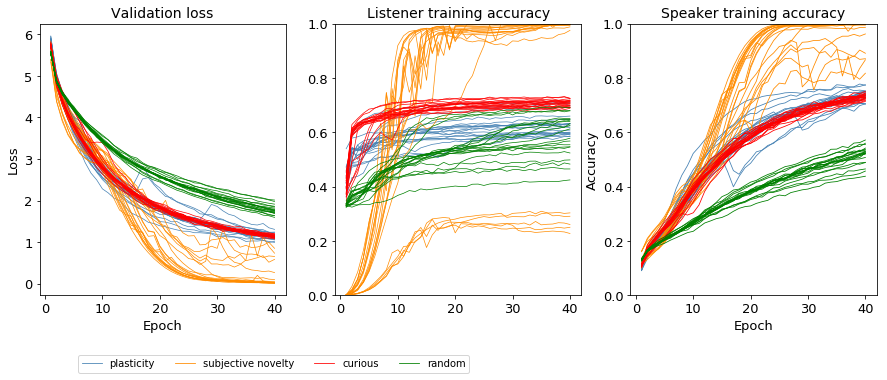

In [20]:
# training plot

# crop out meaningfull loss part [! figure out where these ridiculous numbers come from]
figure = plt.figure(figsize=[15, 5])
#figure.subplots_adjust(hspace=0.4, wspace=0.3)

# making the subplot with train loss
subplot_li_train_loss = figure.add_subplot(1,3,1) # this means we are making the first subplot in a grid of 4 by 1
subplot_li_train_loss.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_li_train_loss.set_title('Validation loss', fontsize=14)
# plotting the Plasticity condition in blue
for scores in train_scores["loss"]["plasticity"]:
    subplot_li_train_loss.plot(x, scores, label='Plasticity', color="steelblue", linewidth=.7)
# plotting the Subjective Novelty condition in orange
for scores in train_scores["loss"]["sn"]:
    subplot_li_train_loss.plot(x, scores, label='Subjective Novelty', color="darkorange", linewidth=.7)
# plotting the curious condition in red
for scores in train_scores["loss"]["curious"]:
    subplot_li_train_loss.plot(x, scores, label='Curious', color="red", linewidth=.7)    
# plotting random in green
for scores in train_scores["loss"]["random"]:
    subplot_li_train_loss.plot(x, scores, label='Random', color="green", linewidth=.7)  
plt.ylabel('Loss', fontsize=13) # add labels so we know what the axes refer to
plt.xlabel('Epoch', fontsize=13)

# making the subplot for listener train acc
subplot_li_train_acc = figure.add_subplot(1,3,2) # second subplot in a 1 by 3 grid
subplot_li_train_acc.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_li_train_acc.set_title('Listener training accuracy', fontsize=14)
for scores in train_scores["li_acc"]["plasticity"]:
    subplot_li_train_acc.plot(x, scores, label='plasticity', color="steelblue", linewidth=.7)
for scores in train_scores["li_acc"]["sn"]:
    subplot_li_train_acc.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.7)
for scores in train_scores["li_acc"]["curious"]:
    subplot_li_train_acc.plot(x, scores, label='curious', color="red", linewidth=.7)
for scores in train_scores["li_acc"]["random"]:
    subplot_li_train_acc.plot(x, scores, label='random', color="green", linewidth=.7)
plt.ylim(0.0, 1.0)
# making the subplot for speaker train acc
subplot_sp_train_acc = figure.add_subplot(1,3,3) # second subplot in a 1 by 3 grid
subplot_sp_train_acc.tick_params(axis = 'both', which = 'major', labelsize = 13)
subplot_sp_train_acc.set_title('Speaker training accuracy', fontsize=14)
for scores in train_scores["sp_acc"]["plasticity"]:
    subplot_sp_train_acc.plot(x, scores, label='plasticity', color="steelblue", linewidth=.8)
for scores in train_scores["sp_acc"]["sn"]:
    subplot_sp_train_acc.plot(x, scores, label='subjective novelty', color="darkorange", linewidth=.8)
for scores in train_scores["sp_acc"]["curious"]:
    subplot_sp_train_acc.plot(x, scores, label='curious', color="red", linewidth=.8)
for scores in train_scores["sp_acc"]["random"]:
    subplot_sp_train_acc.plot(x, scores, label='random', color="green", linewidth=.8)
plt.ylim(0.0, 1.0)
        
# we plot the baseline score as well as the performance of the different model runs
#subplot_li_train_acc.plot(x, li_train_baseline, label='baseline', dashes=[3,6], color='black')
plt.legend(loc='upper center', bbox_to_anchor=(-1.45, -0.2), ncol=4) # the legend needed to be added to the plot
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Epoch', fontsize=13)